<a href="https://colab.research.google.com/github/reeaarana/parkinson-s-classsification/blob/main/parkinson's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("kmader/parkinsons-drawings")

print("Path to dataset files:", path)

100%|██████████| 41.4M/41.4M [00:00<00:00, 48.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kmader/parkinsons-drawings/versions/1


In [ ]:
healthy_path = '/root/.cache/kagglehub/datasets/kmader/parkinsons-drawings/versions/1/spiral/training/healthy/'
parkinson_path = '/root/.cache/kagglehub/datasets/kmader/parkinsons-drawings/versions/1/spiral/training/parkinson'

In [ ]:
data = []

for file in os.listdir(healthy_path):
    if file.endswith(".png") or file.endswith(".jpg"):
      data.append([os.path.join(healthy_path, file), 'healthy'])

for file in os.listdir(parkinson_path):
    if file.endswith(".png") or file.endswith(".jpg"):
      data.append([os.path.join(parkinson_path, file), 'parkinson'])

df = pd.DataFrame(data, columns=['file_path', 'label'])

df.head()
df.tail()
df.shape
df.columns
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  72 non-null     object
 1   label      72 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


,0
file_path,72
label,2


In [ ]:
df['label'].unique()
np.array(['healthy', 'parkinson'], dtype=object)
df['label'].value_counts()

,count
label,
healthy,36
parkinson,36


<ipython-input-6-38bf1b50bfb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


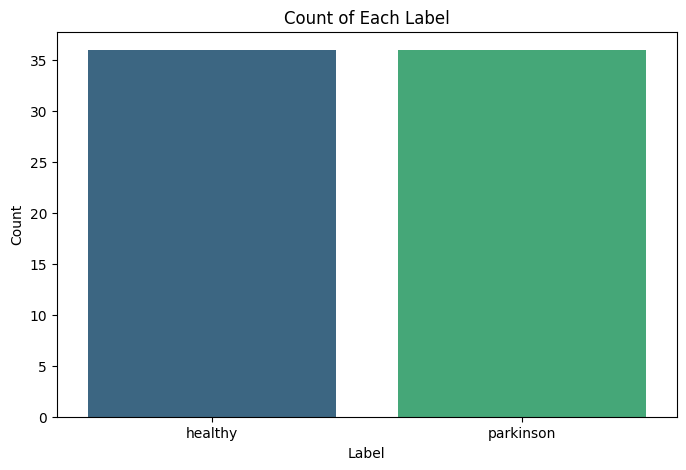

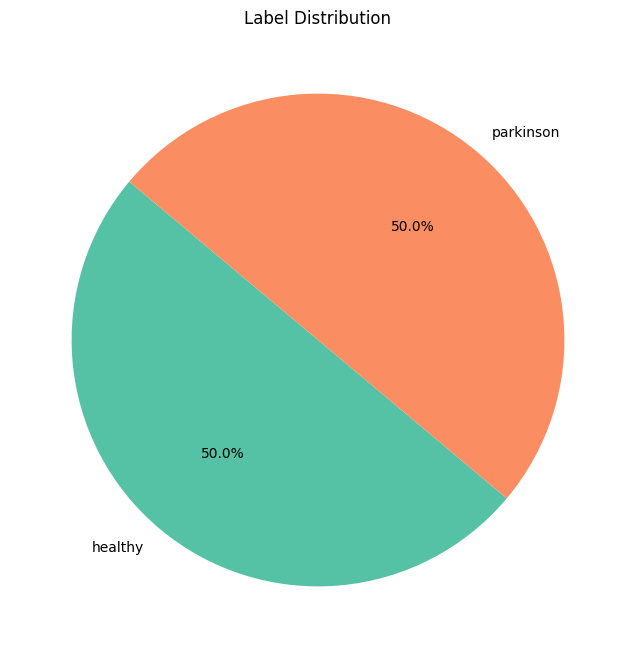

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label', palette='viridis')
plt.title("Count of Each Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 8))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140,
colors=['#56c2a5', '#fb8d62'])
plt.title("Label Distribution")
plt.ylabel("")
plt.show()

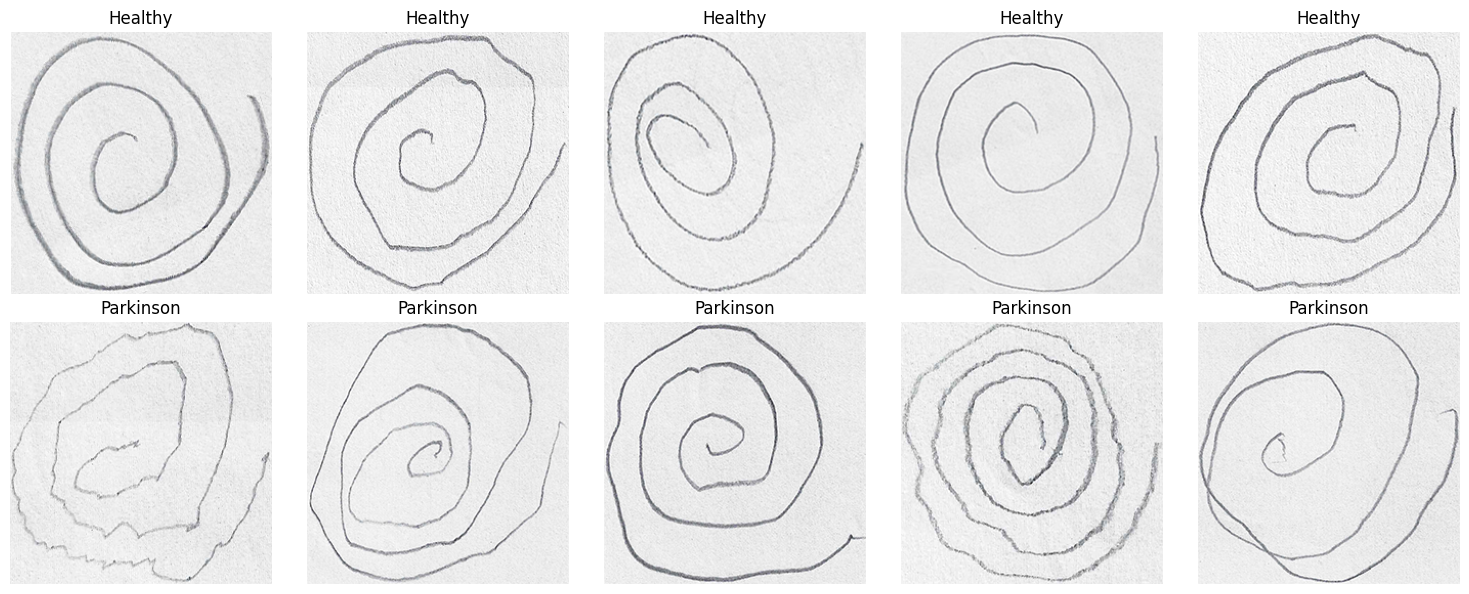

In [ ]:
from PIL import Image
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
  img_healthy = Image.open(df[df['label'] == 'healthy'].iloc[i]['file_path'])
  axes[0, i].imshow(img_healthy, cmap='gray')
  axes[0, i].set_title("Healthy")
  axes[0, i].axis('off')
  img_parkinson = Image.open(df[df['label'] == 'parkinson'].iloc[i]['file_path'])
  axes[1, i].imshow(img_parkinson, cmap='gray')
  axes[1, i].set_title("Parkinson")
  axes[1, i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import time
import shutil
import pathlib
import itertools
from PIL import Image
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings("ignore")
print ('check')

check


In [ ]:
train_df_new, temp_df_new = train_test_split(
    df,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df['label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)


Found 57 validated image filenames belonging to 2 classes.
Found 7 validated image filenames belonging to 2 classes.
Found 8 validated image filenames belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
  print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
restore_best_weights=True)

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):
  inputs = Input(shape=input_shape)
  base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)

  for layer in base_model.layers:
    layer.trainable = False

  x = base_model.output
  height, width, channels = 5, 5, 2048
  x = Reshape((height * width, channels))(x)
  attention_output = MultiHeadAttention(num_heads=8,
                                        key_dim=channels)(x, x)
  attention_output = Reshape((height, width, channels))(attention_output)

  x = GaussianNoise(0.25)(attention_output)
  x = GlobalAveragePooling2D()(x)
  x = Dense(512, activation='relu')(x)
  x = BatchNormalization()(x)
  x = GaussianNoise(0.25)(x)
  x = Dropout(0.25)(x)
  outputs = Dense(1, activation='sigmoid')(x)
  model = Model(inputs=inputs, outputs=outputs)

  return model


input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = cnn_model.fit(
  train_gen_new,
  validation_data=valid_gen_new,
  epochs=1000,
  verbose=1
)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 1.0000 - loss: 4.0651e-04 - val_accuracy: 0.7143 - val_loss: 2.4086
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 1.0000 - loss: 1.3641e-04 - val_accuracy: 0.7143 - val_loss: 2.3849
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 1.0000 - loss: 1.6028e-04 - val_accuracy: 0.7143 - val_loss: 2.3596
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 6.0202e-04 - val_accuracy: 0.7143 - val_loss: 2.3291
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 1.0000 - loss: 3.0307e-05 - val_accuracy: 0.7143 - val_loss: 2.3035
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 1.0000 - loss: 5.1133e-05 - val_accuracy: 0.7143 - val_loss: 2.2824
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 1.0000 - loss: 2.8096e-05 - val_accuracy: 0.7143 - val_loss: 2.2703
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 1.0000 - los

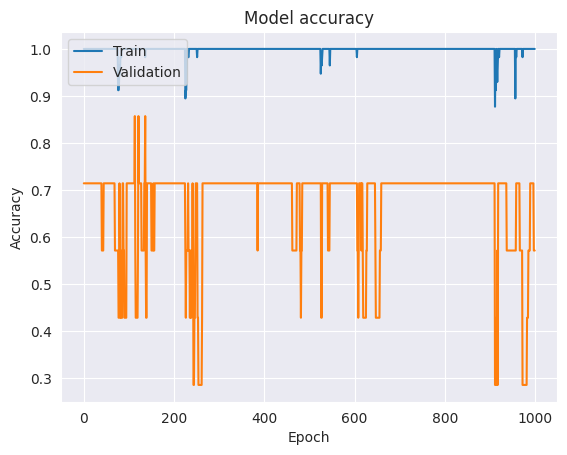

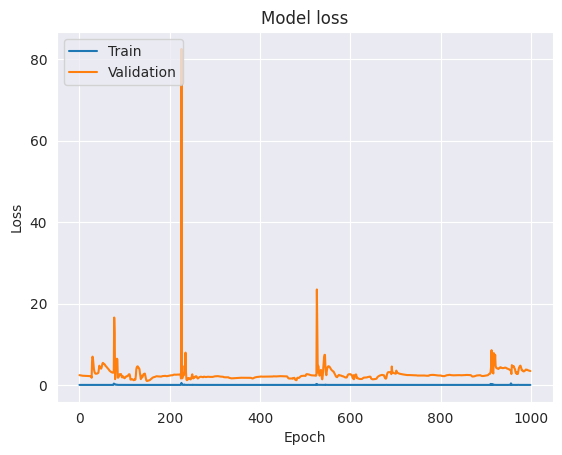

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_labels = (predictions > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels,
target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00         4
   parkinson       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



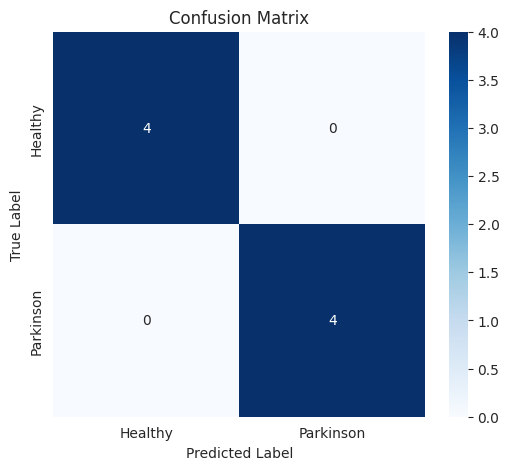

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Healthy', 'Parkinson'], yticklabels=['Healthy', 'Parkinson'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
  inputs = Input(shape=input_shape)
  base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

  for layer in base_model.layers:
    layer.trainable = False

  x = base_model.output

  height, width, channels = 7, 7, 2048
  x = Reshape((height * width, channels))(x)

  attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
  attention_output = Reshape((height, width, channels))(attention_output)

  x = GaussianNoise(0.25)(attention_output)
  x = GlobalAveragePooling2D()(x)
  x = Dense(512, activation='relu')(x)
  x = BatchNormalization()(x)
  x = GaussianNoise(0.25)(x)
  x = Dropout(0.25)(x)
  outputs = Dense(1, activation='sigmoid')(x)

  model = Model(inputs=inputs, outputs=outputs)

  return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=1000,
    verbose=1
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.6758 - loss: 0.7197 - val_accuracy: 0.8571 - val_loss: 0.5264
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.7817 - loss: 0.4656 - val_accuracy: 0.4286 - val_loss: 0.5922
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.8641 - loss: 0.2532 - val_accuracy: 0.4286 - val_loss: 0.6721
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.9741 - loss: 0.1649 - val_accuracy: 0.4286 - val_loss: 0.7114
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.9676 - loss: 0.1499 - val_accuracy: 0.4286 - val_loss: 0.8685
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.9881 - loss: 0.1257 - val_accuracy: 0.4286 - val_loss: 1.1290
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.9692 - loss: 0.0961 - val_accuracy: 0.4286 - val_loss: 1.1679
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - a

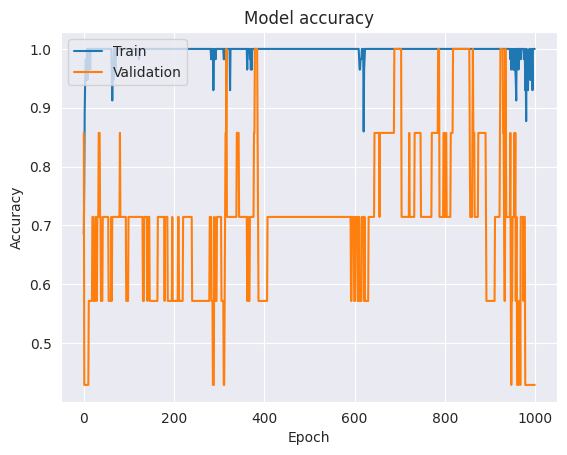

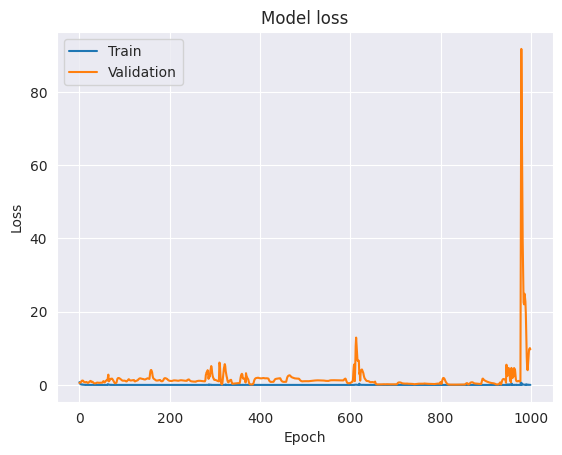

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_labels = (predictions > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels,
target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

     healthy       0.00      0.00      0.00         4
   parkinson       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



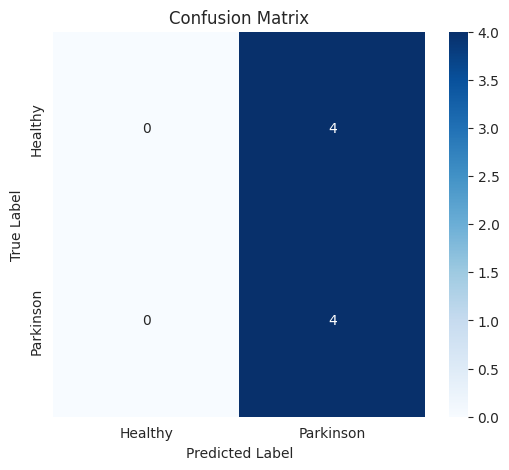

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Healthy', 'Parkinson'], yticklabels=['Healthy', 'Parkinson'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

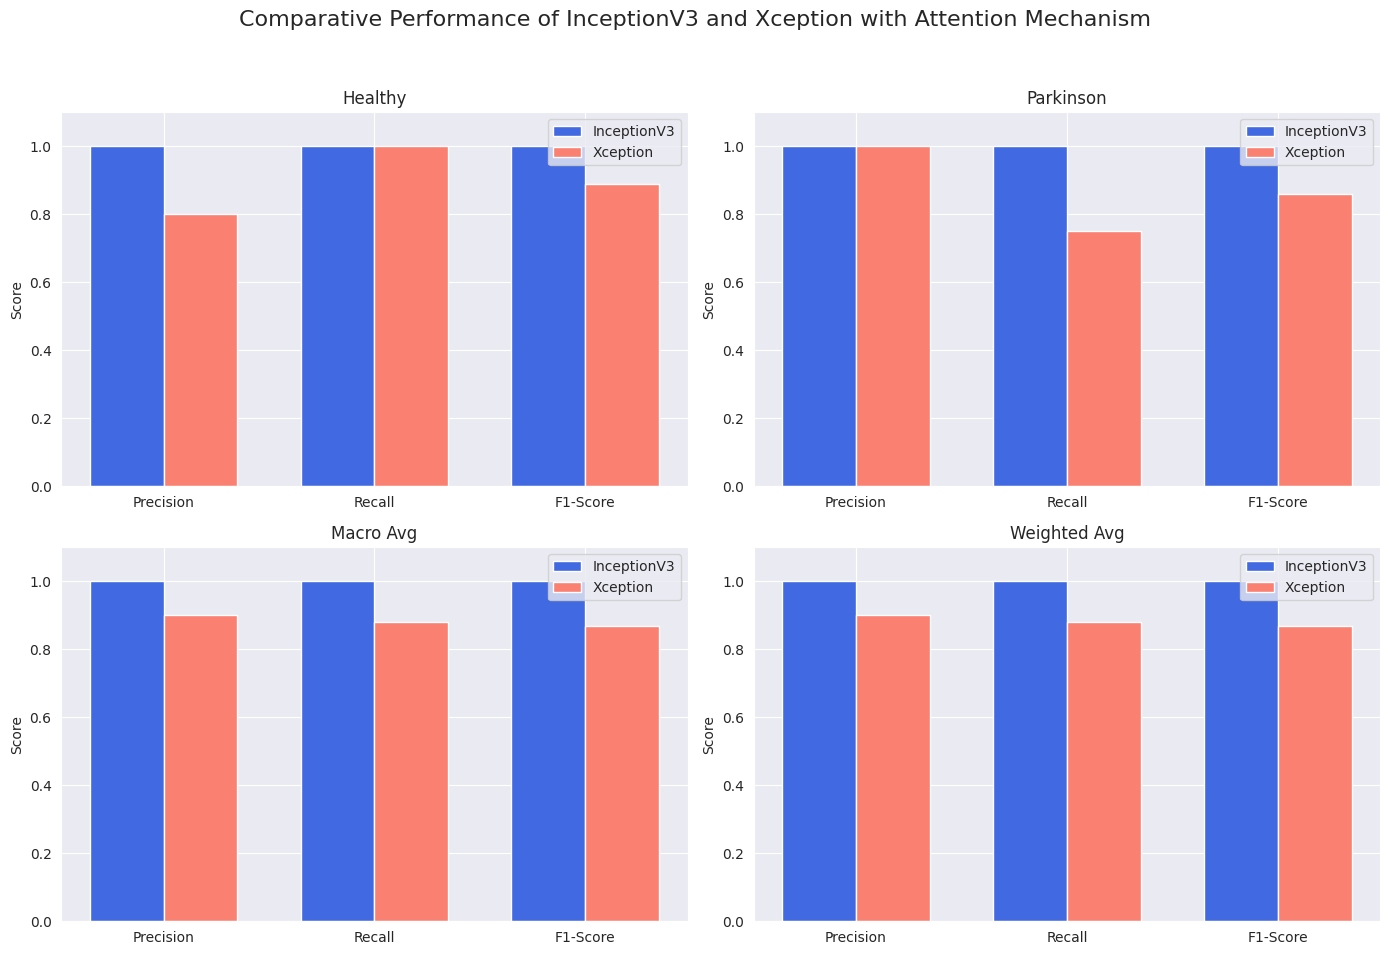

In [ ]:
metrics = ["Precision", "Recall", "F1-Score"]
labels = ["Healthy", "Parkinson", "Macro Avg", "Weighted Avg"]

inceptionv3_scores = {
  "Healthy": [1.00, 1.00, 1.00],
  "Parkinson": [1.00, 1.00, 1.00],
  "Macro Avg": [1.00, 1.00, 1.00],
  "Weighted Avg": [1.00, 1.00, 1.00]
}

xception_scores = {
  "Healthy": [0.80, 1.00, 0.89],
  "Parkinson": [1.00, 0.75, 0.86],
  "Macro Avg": [0.90, 0.88, 0.87],
  "Weighted Avg": [0.90, 0.88, 0.87]
}

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Comparative Performance of InceptionV3 and Xception with Attention Mechanism", fontsize=16)

for i, label in enumerate(labels):
  row, col = divmod(i, 2)
  ax[row, col].bar(x - width / 2, inceptionv3_scores[label], width, label="InceptionV3", color='royalblue')
  ax[row, col].bar(x + width / 2, xception_scores[label], width, label="Xception", color='salmon')
  ax[row, col].set_title(label)
  ax[row, col].set_xticks(x)
  ax[row, col].set_xticklabels(metrics)
  ax[row, col].set_ylim([0, 1.1])
  ax[row, col].legend()
  ax[row, col].set_ylabel("Score")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()